In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
#Import EPL data
url_EPLSeason1819 = 'https://datahub.io/sports-data/english-premier-league/r/season-1819.csv'
url_EPLSeason1718 = 'https://datahub.io/sports-data/english-premier-league/r/season-1718.csv'
url_EPLSeason1617 = 'https://datahub.io/sports-data/english-premier-league/r/season-1617.csv'
url_EPLSeason1516 = 'https://datahub.io/sports-data/english-premier-league/r/season-1516.csv'
url_EPLSeason1415 = 'https://datahub.io/sports-data/english-premier-league/r/season-1415.csv'
url_EPLSeason1314 = 'https://datahub.io/sports-data/english-premier-league/r/season-1314.csv'
url_EPLSeason1213 = 'https://datahub.io/sports-data/english-premier-league/r/season-1213.csv'
url_EPLSeason1112 = 'https://datahub.io/sports-data/english-premier-league/r/season-1112.csv'
url_EPLSeason1011 = 'https://datahub.io/sports-data/english-premier-league/r/season-1011.csv'
url_EPLSeason0910 = 'https://datahub.io/sports-data/english-premier-league/r/season-0910.csv'
EPLSeason1819 = pd.read_csv(url_EPLSeason1819)
EPLSeason1718 = pd.read_csv(url_EPLSeason1718)
EPLSeason1617 = pd.read_csv(url_EPLSeason1617)
EPLSeason1516 = pd.read_csv(url_EPLSeason1516)
EPLSeason1415 = pd.read_csv(url_EPLSeason1415)
EPLSeason1314 = pd.read_csv(url_EPLSeason1314)
EPLSeason1213 = pd.read_csv(url_EPLSeason1213)
EPLSeason1112 = pd.read_csv(url_EPLSeason1112)
EPLSeason1011 = pd.read_csv(url_EPLSeason1011)
EPLSeason0910 = pd.read_csv(url_EPLSeason0910)
#Create a dataframe of all EPL Seasons
frames = [EPLSeason1819,EPLSeason1718,EPLSeason1617,EPLSeason1516,EPLSeason1415,EPLSeason1314,EPLSeason1213,EPLSeason1112,EPLSeason1011,EPLSeason0910]
EPLSeasons = pd.concat(frames)
EPLSeasons.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [2]:
#View shape of dataframe
EPLSeasons.shape

(3766, 22)

In [3]:
#View columns
EPLSeasons.columns

#'Date': Match Date (dd/mm/yy)
#'HomeTeam': Home Team
#'AwayTeam': Away Team
#'FTHG': Full Time Home Team Goals
#'FTAG': Full Time Away Team Goals
#'FTR': Full Time Result (H=Home Win, D=Draw, A=Away Win)
#'HTHG': Half Time Home Team Goals
#'HTAG': Half Time Away Team Goals
#'HTR': Half Time Result (H=Home Win, D=Draw, A=Away Win)
#'Referee': 
#'HS': Home Team Shots
#'AS': Away Team Shots
#'HST': Home Team Shots on Target
#'AST': Away Team Shots on Target
#'HF': Home Team Fouls Committed
#'AF': Away Team Fouls Committed
#'HC': Home Team Corners
#'AC': Away Team Corners
#'HY': Home Team Yellow Cards
#'AY': Away Team Yellow Cards
#'HR': Home Team Red Cards
#'AR': Away Team Red Cards 

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

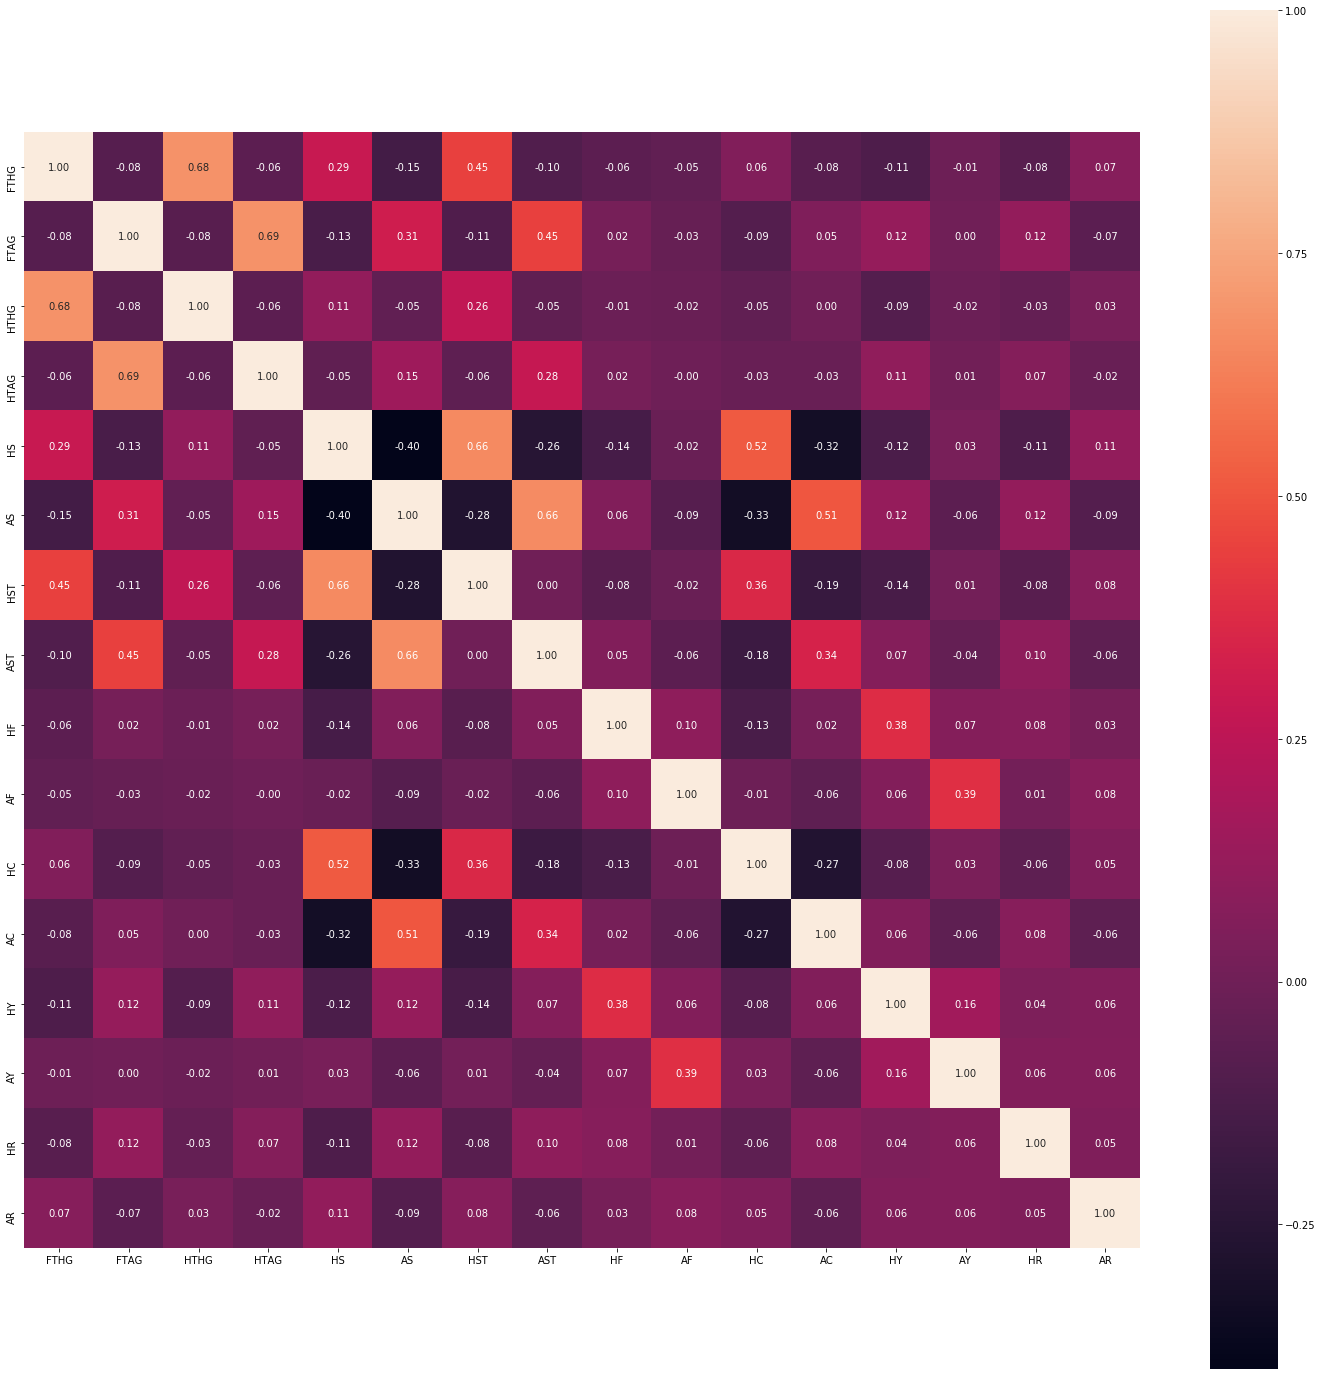

In [4]:
#Heatmap of correlation
pl.figure(figsize =(25,25))
corrmat = EPLSeasons.corr()
sns.heatmap(corrmat, annot=True, fmt='.2f', square=True);
plt.show()

In [5]:
#Create another column that yields goal difference
EPLSeasons['GD'] = EPLSeasons['FTHG']-EPLSeasons['FTAG']
EPLSeasons['HTGD'] = EPLSeasons['HTHG']-EPLSeasons['HTAG']
EPLSeasons.shape

(3766, 24)

In [6]:
#Encode categorical data - Convert categorical column in the dataset to numerical data.
EPLSeasons['HomeTeam'] = enc.fit_transform(EPLSeasons['HomeTeam'])
EPLSeasons['AwayTeam'] = enc.fit_transform(EPLSeasons['AwayTeam'])
EPLSeasons['FTR'] = enc.fit_transform(EPLSeasons['FTR'])
EPLSeasons['HTR'] = enc.fit_transform(EPLSeasons['HTR'])
EPLSeasons['Referee'] = enc.fit_transform(EPLSeasons['Referee'])

enc.classes_ #Maintains the information of the encoded values. Encode a non-numerical data into a numerical data

EPLSeasons.head()
#Notice how all of the non-numerical columns are now numerical

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HF,AF,HC,AC,HY,AY,HR,AR,GD,HTGD
0,2018-08-10,19,16,2,1,2,1,0,2,1,...,11,8,2,5,2,1,0,0,1,1
1,2018-08-11,6,9,2,0,2,1,0,2,12,...,11,9,7,4,1,1,0,0,2,1
2,2018-08-11,13,11,0,2,0,0,1,0,18,...,9,11,5,5,1,2,0,0,-2,-1
3,2018-08-11,14,10,0,3,0,0,2,0,5,...,9,8,2,5,2,1,0,0,-3,-2
4,2018-08-11,21,30,1,2,0,1,2,0,16,...,11,12,3,5,2,2,0,0,-1,-1


In [7]:
#View columns
EPLSeasons.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'GD', 'HTGD'],
      dtype='object')

In [8]:
#Convert date string to float
EPLSeasons['Date'] = pd.to_datetime(arg=EPLSeason1819['Date'])
#Separating the days, months, and years into descrete columns
EPLSeasons["Month"] = EPLSeasons["Date"].dt.month
EPLSeasons["Day"] = EPLSeasons["Date"].dt.day
EPLSeasons["Year"] = EPLSeasons["Date"].dt.year
#Delete the 'Date' column as it causes problems later on in scaling
del EPLSeasons['Date']
#View latest EPLSeason1819
EPLSeasons.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AC,HY,AY,HR,AR,GD,HTGD,Month,Day,Year
0,19,16,2,1,2,1,0,2,1,8,...,5,2,1,0,0,1,1,8.0,10.0,2018.0
1,6,9,2,0,2,1,0,2,12,12,...,4,1,1,0,0,2,1,8.0,11.0,2018.0
2,13,11,0,2,0,0,1,0,18,15,...,5,1,2,0,0,-2,-1,8.0,11.0,2018.0
3,14,10,0,3,0,0,2,0,5,6,...,5,2,1,0,0,-3,-2,8.0,11.0,2018.0
4,21,30,1,2,0,1,2,0,16,15,...,5,2,2,0,0,-1,-1,8.0,11.0,2018.0


In [9]:
#Check for null values
print('Let\'s check for null values\n')
print(EPLSeasons.isnull().sum())

Let's check for null values

HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
Referee       0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
GD            0
HTGD          0
Month       306
Day         306
Year        306
dtype: int64


In [10]:
#Replace NaNs w/ 0
EPLSeasons['Month'].fillna(0, inplace=True)
EPLSeasons['Day'].fillna(0, inplace=True)
EPLSeasons['Year'].fillna(0, inplace=True)

In [11]:
#Scale data (0 to 1) to normalize the relationships
scaler.fit(EPLSeasons)
EPLSeasons_scaled = pd.DataFrame(scaler.transform(EPLSeasons), index=EPLSeasons.index, columns=EPLSeasons.columns)
#View scaled data
EPLSeasons_scaled.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'GD', 'HTGD', 'Month', 'Day', 'Year'],
      dtype='object')

In [12]:
#Seperate features from output
x = EPLSeasons[['HomeTeam', 'AwayTeam', 'HTGD', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'Month', 'Day', 'Year']]
y = EPLSeasons[['FTR']]
print('Class labels:', np.unique(y))


#Split test and training data for target object 1
#By default 75% training data and 25% testing data but we will do 80% training data and 20% testing data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=.2,
                                                    random_state=1)

Class labels: [0 1 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#View shape of train and test data sets for both feature and response
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3012, 20) (754, 20) (3012, 1) (754, 1)


In [14]:
#Train a logistic Regression Model on the training set
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
#Make predictions for the testing set using Logistic Regression
logReg_y_predict = logReg.predict(x_test)
log_score = accuracy_score(y_test,logReg_y_predict)

#Train a Random Forest Classifier Model on the training set
RFC = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
RFC.fit(x_train,y_train)
#Make predictions for the testing set using Random Forest Classifier
RFC_y_pred = RFC.predict(x_test)
RFC_score=accuracy_score(y_test,RFC_y_pred)

#Train a Decision Tree Classifier Model on the training set
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(x_train,y_train)
#Make predictions for the testing set using Decision Tree Classifier
DTC_y_pred = DTC.predict(x_test)
DTC_score = accuracy_score(y_test, DTC_y_pred)

#Train a Linear Support Vector Classification Model on the training set
LSVC = svm.LinearSVC(random_state=0)
LSVC.fit(x_train, y_train)
#Make predictions for the testing set using Linear Support Vector Classification
LSVC_y_pred = LSVC.predict(x_test)
LSVC_score = accuracy_score(y_test,LSVC_y_pred)

#Train a Naive Bayes Model on the training set
BNB = BernoulliNB()
BNB.fit(x_train,y_train)
#Make predictions for the testing set using Naive Bayes
BNB_y_pred = BNB.predict(x_test)
bayes_score = accuracy_score(y_test,BNB_y_pred)

#Train a K Neareest Neighbors Model on the training set
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
#Make preditions for the testing set using K Nearest Neighbors Model
KNN_pred = KNN.predict(x_test)
KNN_score = accuracy_score(y_test,KNN_pred)


#Print coefficients of Logistic Regression Model
#print('Coefficients per Logistic Regression Model:',logReg.coef_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [15]:
#Print the accuracy score of multiple models
print('Accuracy of Logistic Regression Model: %.2f' % accuracy_score(y_test, logReg_y_predict))
print('Accuracy of Random Forest Classifier Model:', RFC_score)
print('Accuracy of Decision Tree Classifier Model: ', DTC_score)
print('Accuracy of LSVC Model: ', LSVC_score)
print('Accuracy of Naive Bayes Model: ', bayes_score)
print('Accuracy of KNN Model: ', KNN_score)

Accuracy of Logistic Regression Model: 0.68
Accuracy of Random Forest Classifier Model: 0.6671087533156499
Accuracy of Decision Tree Classifier Model:  0.5570291777188329
Accuracy of LSVC Model:  0.4297082228116711
Accuracy of Naive Bayes Model:  0.636604774535809
Accuracy of KNN Model:  0.4416445623342175
